## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anishsoni/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/anishsoni/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Importing the dataset

In [3]:
df = pd.read_csv('fake reviews dataset.csv')

### Data Pre-processing

In [4]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [5]:
df.tail()

,category,rating,label,text_
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...
40431,Clothing_Shoes_and_Jewelry_5,5.0,OR,I work in the wedding industry and have to wor...


### Null values in the dataset

In [6]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [7]:
##this means that the data sample downloaded is already cleaned.

### Getting information about the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [9]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### Checking the rating count

In [10]:
df['rating'].value_counts()

5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: rating, dtype: int64

## Plotting the dataset

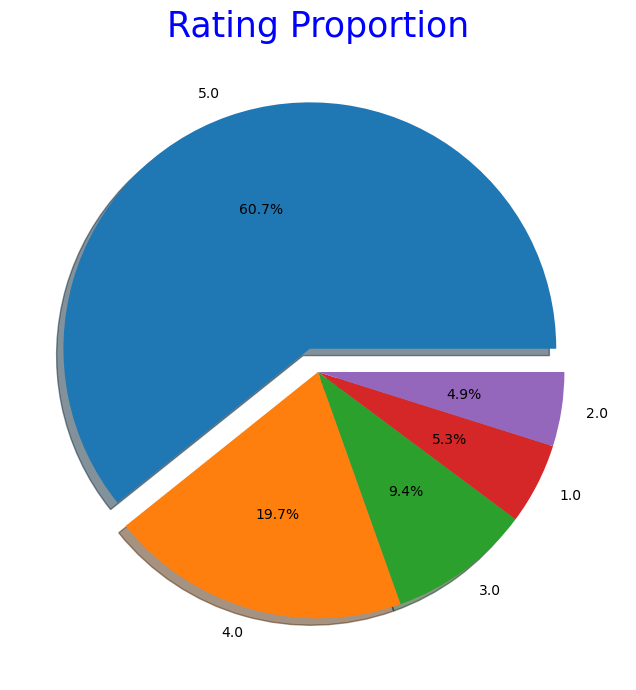

In [11]:
plt.figure(figsize=(15,8))
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Rating Proportion',fontweight='medium',fontsize=25,pad=20,color='blue')
plt.show()

In [12]:
#creating a function to remove the punctuations
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [13]:
df['text_'][2], clean_text(df['text_'][2])

('This pillow saved my back. I love the look and feel of this pillow.',
 'pillow saved back love look feel pillow')

In [14]:
df['text_'].head().apply(clean_text)

0    Love Well made sturdy comfortable love itVery ...
1    love great upgrade original Ive mine couple years
2              pillow saved back love look feel pillow
3          Missing information use great product price
4                 nice set Good quality set two months
Name: text_, dtype: object

In [15]:
df.shape

(40432, 4)

In [16]:
#converting the text to string type
df['text_'] = df['text_'].astype(str)

In [17]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [18]:
preprocess(df['text_'][2])

'This pillow saved back I love look feel pillow'

In [19]:
df['text_'][:40432] = df['text_'][:40432].apply(preprocess)

In [20]:
df['text_'] = df['text_'].str.lower()

In [21]:
#using stemmer to bring the word to it's stem form
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['text_'] = df['text_'].apply(lambda x: stem_words(x))

In [22]:
#stemming is used to bring the code to the root word
#lemmatisation is used to bring the code to the root word meaning (grammatical syntax is important)

In [23]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df['text_'] = df['text_'].apply(lambda x: lemmatize_words(x))

In [24]:
df['text_'].head()

0    love well made sturdi comfort i love veri pretti
1      love great upgrad origin i 've mine coupl year
2        thi pillow save back i love look feel pillow
3               miss inform use great product price i
4         veri nice set good qualiti we set two month
Name: text_, dtype: object

### Final Pre-Processed Dataframe

In [25]:
df

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year
2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,i read review say bra ran small i order two ba...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,i n't sure exactli would it littl larg small s...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,you wear hood wear hood wear jacket without ho...
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,i like noth dress the reason i gave star i ord...


In [26]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year
2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month


In [27]:
df.dropna(inplace = True)

In [28]:
df['length'] = df['text_'].apply(len)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
 4   length    40432 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ MB


### Data Visualisation

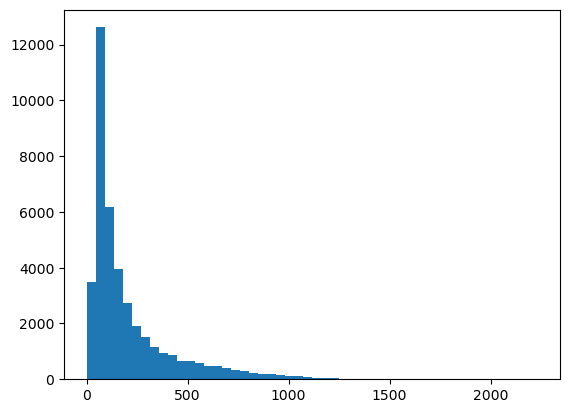

In [30]:
plt.hist(df['length'], bins = 50)
plt.show()

In [31]:
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20216.0  4.259893  1.141065  1.0  4.0  5.0  5.0  5.0  20216.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                
             mean         std  min   25%    50%    75%     max  
label                                                           
CG     173.620449  173.942232  0.0  57.0   99.0  217.0  1300.0  
OR     237.885734  252.923849  8.0  74.0  134.0  296.0  2232.0

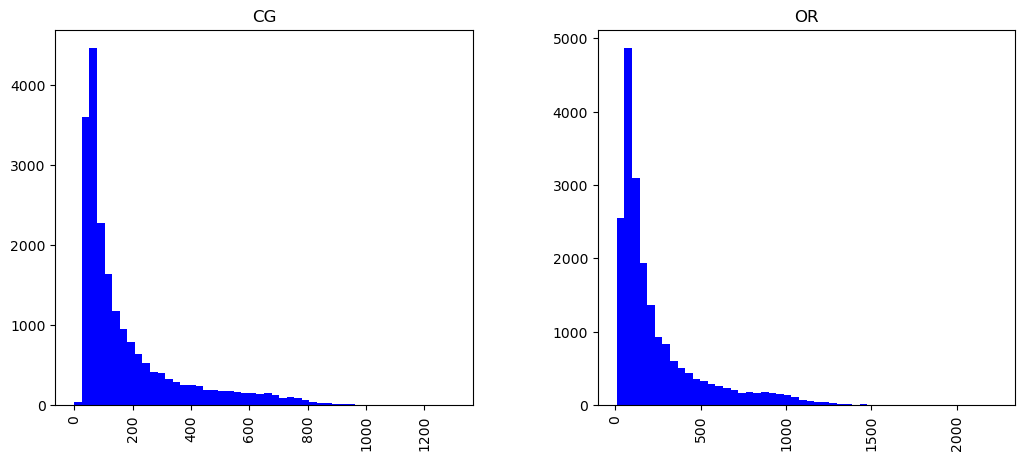

In [32]:
df.hist(column='length',by='label',bins=50,color='blue',figsize=(12,5))
plt.show()

In [33]:
df[df['label']=='OR'][['text_','length']].sort_values(by='length',ascending=False).head().iloc[0].text_

"weak on current scienc after see twice i agre much posit five star review out respect read review i 'll repeat everyth i like present i found goofi over ear hairdo facial hair arrang daniel vitali describ `` wild food expert '' distract ugh ditto david wolf extrem goofi wild hairdo on hand jon gabriel describ `` author weight loss expert '' nice groom good present hi stori person transform fellow pound whew becom jock normal weight inspir christian northrup preserv rank one america 's cutest doctor a realli nice look woman present dr. mercola jason vale kri carr alejandro junger fine it disappoint jami oliv popular uk give babi cow growth fluid pas unscientif popular idea milk none present anyth zilch say work doctor t. colin campbel milk bodi bad it good see present take stand sugar they agre evil sugar refin carbohydr with respect dr. northrup `` it 's fat make fat 's sugar '' statement pas muster commun expert recogn evil sugar not mutual exclus recogn proven danger fat particularl

In [34]:
df.length.describe()

count    40432.000000
mean       205.753092
std        219.418672
min          0.000000
25%         64.000000
50%        116.000000
75%        253.000000
max       2232.000000
Name: length, dtype: float64

In [35]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [36]:
bow_transformer = CountVectorizer(analyzer = text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x16712ff40>)

In [37]:
bow_transformer.fit(df['text_'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 34443


In [38]:
review4 = df['text_'][3]
review4

'miss inform use great product price i'

In [39]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

  (0, 13596)	1
  (0, 15838)	1
  (0, 19845)	1
  (0, 23842)	1
  (0, 23972)	1
  (0, 32175)	1
(1, 34443)


In [40]:
print(bow_transformer.get_feature_names_out()[13596])
print(bow_transformer.get_feature_names_out()[23842])

# //get_feature_names() is the new syntax
# //get_feature_names_out() was the old syntax

great
price


In [41]:
bow_reviews = bow_transformer.transform(df['text_'])

In [42]:
print("Shape of Bag of Words Transformer for the entire reviews corpus: ", bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus:  (40432, 34443)
Amount of non zero values in the bag of words model: 1013894


In [43]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.07


In [44]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 13596)	1
  (0, 15838)	1
  (0, 19845)	1
  (0, 23842)	1
  (0, 23972)	1
  (0, 32175)	1


In [45]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['car']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['red']])

5.279464778477772
6.135130888535492


In [46]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape: ", tfidf_reviews.shape)
print("No. of Dimensions:", tfidf_reviews.ndim)

Shape:  (40432, 34443)
No. of Dimensions: 2


### Creating Training and Testing Data

In [47]:
review_train, review_test, label_train, label_test = train_test_split(df['text_'],df['label'],test_size=0.35)

In [48]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

### Training and Testing Multinomial Naive Bayes Algo

In [49]:
pipeline.fit(review_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x16712ff40>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [50]:
mnn_pred = pipeline.predict(review_test)
mnn_pred

array(['CG', 'CG', 'CG', ..., 'CG', 'OR', 'CG'], dtype='<U2')

In [51]:
print('Classification Report:',classification_report(label_test,mnn_pred))
print('Confusion Matrix:',confusion_matrix(label_test,mnn_pred))
print('Accuracy Score:',accuracy_score(label_test,mnn_pred))

Classification Report:               precision    recall  f1-score   support

          CG       0.83      0.88      0.85      7107
          OR       0.87      0.81      0.84      7045

    accuracy                           0.85     14152
   macro avg       0.85      0.85      0.85     14152
weighted avg       0.85      0.85      0.85     14152

Confusion Matrix: [[6236  871]
 [1311 5734]]
Accuracy Score: 0.8458168456755228


#### Model Prediction Accuracy :

In [52]:
str(np.round(accuracy_score(label_test,mnn_pred)*100,2)) + '%'

'84.58%'

### Training and Testing Random Forest Algo

In [53]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [54]:
pipeline.fit(review_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x16712ff40>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [55]:
rfc_pred = pipeline.predict(review_test)
rfc_pred

array(['CG', 'CG', 'CG', ..., 'CG', 'CG', 'CG'], dtype=object)

In [56]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:' , str)

Classification Report:               precision    recall  f1-score   support

          CG       0.82      0.89      0.85      7107
          OR       0.88      0.80      0.84      7045

    accuracy                           0.84     14152
   macro avg       0.85      0.84      0.84     14152
weighted avg       0.85      0.84      0.84     14152

Confusion Matrix: [[6308  799]
 [1415 5630]]
Accuracy Score: 0.8435556811758056
Model Prediction Accuracy: <class 'str'>


#### Model Prediction Accuracy :

In [57]:
str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%'

'84.36%'

### Training and Testing SVC

In [58]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [59]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x16712ff40>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [60]:
svc_pred = pipeline.predict(review_test)
svc_pred

array(['CG', 'CG', 'CG', ..., 'CG', 'OR', 'CG'], dtype=object)

In [61]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))

Classification Report:               precision    recall  f1-score   support

          CG       0.89      0.86      0.87      7107
          OR       0.86      0.90      0.88      7045

    accuracy                           0.88     14152
   macro avg       0.88      0.88      0.88     14152
weighted avg       0.88      0.88      0.88     14152

Confusion Matrix: [[6078 1029]
 [ 722 6323]]
Accuracy Score: 0.876271905031091


#### Model Prediction Accuracy :

In [62]:
str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%'

'87.63%'

### Training and Testing Decision Tree Classifier

In [63]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [64]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x16712ff40>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [65]:
dtree_pred = pipeline.predict(review_test)
dtree_pred

array(['OR', 'OR', 'CG', ..., 'OR', 'CG', 'CG'], dtype=object)

In [66]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))

Classification Report:               precision    recall  f1-score   support

          CG       0.73      0.77      0.75      7107
          OR       0.75      0.72      0.74      7045

    accuracy                           0.74     14152
   macro avg       0.74      0.74      0.74     14152
weighted avg       0.74      0.74      0.74     14152

Confusion Matrix: [[5448 1659]
 [1971 5074]]
Accuracy Score: 0.7434991520633126


#### Model Prediction Accuracy :

In [67]:
str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%'

'74.35%'

### Training and Testing KNN

In [94]:
# import os
# os.environ["OMP_NUM_THREADS"] = "1"

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',KNeighborsClassifier(n_neighbors=2))
])

In [85]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x16712ff40>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier(n_neighbors=2))])

In [96]:
# issue with the BLAS library
knn_pred = pipeline.predict(review_test)
knn_pred

NotFittedError: Vocabulary not fitted or provided

#### Model Prediction Accuracy :

In [84]:
str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%'

NameError: name 'knn_pred' is not defined

### Training and Testing Logistic Regression

In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [ ]:
pipeline.fit(review_train, label_train)

In [ ]:
lr_pred = pipeline.predict(review_test)
lr_pred

#### Model Prediction Accuracy :

In [ ]:
str(np.round(accuracy_score(label_test, lr_pred)*100,2)) + '%'

## Conclusion

In [ ]:
print('Performance of various ML models:')
print('\n')

print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')